In [1]:
import pandas as pd

# Загрузка файла
file_path = 'AllData_With_36stC5_FULL_COMPLITE_EDITION.csv'
df = pd.read_csv(file_path, sep=';', decimal='.', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Cruise,Station,Latitude [degrees_north],Longitude [degrees_east],Date,Pressure,Depth [m],Bot. Depth [m],Temperature [degrees_C],Conductivity,Type
1,Nord3_18,18001,55.0008726,19.9260096,26.07.2018 6:18,0.250029689,0.254959274,41.67571718,23.87814522,10.63175195,c
2,Nord3_18,18001,55.0008726,19.9260096,26.07.2018 6:18,0.408002866,0.416047051,41.67571718,23.47824097,10.62074609,c
3,Nord3_18,18001,55.0008726,19.9260096,26.07.2018 6:18,0.55165567,0.562532114,41.67571718,23.35667038,10.62453027,c
4,Nord3_18,18001,55.0008726,19.9260096,26.07.2018 6:18,0.687081126,0.700627618,41.67571718,23.30447006,10.64925977,c


In [2]:
# Переименуем столбцы для удобства
df.columns = df.iloc[0]  # Устанавливаем первую строку как названия столбцов
df = df.drop(0)  

# Извлекаем необходимые столбцы
df_clean = df[['Station', 'Depth [m]', 'Temperature [degrees_C]']].copy()

# Преобразуем столбцы глубины и температуры в числовой формат (проверка корректности данных)
df_clean['Depth [m]'] = pd.to_numeric(df_clean['Depth [m]'], errors='coerce')
df_clean['Temperature [degrees_C]'] = pd.to_numeric(df_clean['Temperature [degrees_C]'], errors='coerce')

# Сортируем данные по станции и глубине
df_clean = df_clean.sort_values(by=['Station', 'Depth [m]']).reset_index(drop=True)
df_clean.head()

,Station,Depth [m],Temperature [degrees_C]
0,18001,0.254959,23.878145
1,18001,0.416047,23.478241
2,18001,0.562532,23.356670
3,18001,0.700628,23.304470
4,18001,0.825476,23.280445


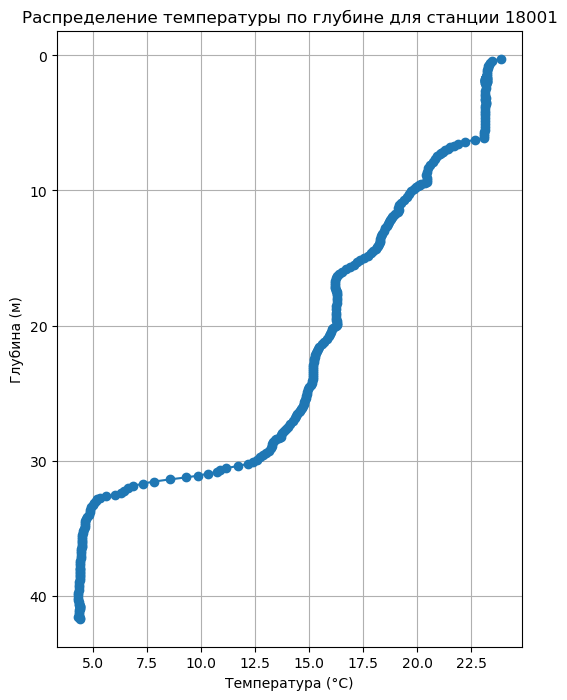

In [3]:
import matplotlib.pyplot as plt

# Выбираем данные для станции 18001 
station = '18001'
df_station = df_clean[df_clean['Station'] == station]

# Построение графика для этой станции
plt.figure(figsize=(6, 8))
plt.plot(df_station['Temperature [degrees_C]'], df_station['Depth [m]'], marker='o')

plt.xlabel('Температура (°C)')
plt.ylabel('Глубина (м)')
plt.gca().invert_yaxis()

plt.grid(True)
plt.title(f'Распределение температуры по глубине для станции {station}')
plt.show()

In [4]:
# Функция для расчета производных аппроксимацией вперед, назад и центральной
def calculate_derivatives(df):
    df['Forward_diff'] = (df['Temperature [degrees_C]'].shift(-1) - df['Temperature [degrees_C]']) / \
                         (df['Depth [m]'].shift(-1) - df['Depth [m]'])

    df['Backward_diff'] = (df['Temperature [degrees_C]'] - df['Temperature [degrees_C]'].shift(1)) / \
                          (df['Depth [m]'] - df['Depth [m]'].shift(1))

    df['Central_diff'] = (df['Temperature [degrees_C]'].shift(-1) - df['Temperature [degrees_C]'].shift(1)) / \
                         (df['Depth [m]'].shift(-1) - df['Depth [m]'])

    return df

In [5]:
# Рассчет для всех станций
stations = df_clean['Station'].unique()
results = []

for station in stations:
    df_station = df_clean[df_clean['Station'] == station].copy() 
    df_station_with_diff = calculate_derivatives(df_station)  
    results.append(df_station_with_diff)
    
df_results = pd.concat(results)

df_results[['Station', 'Depth [m]', 'Temperature [degrees_C]', 'Forward_diff', 'Backward_diff', 'Central_diff']]

,Station,Depth [m],Temperature [degrees_C],Forward_diff,Backward_diff,Central_diff
0,18001,0.254959,23.878145,-2.482524,NaN,NaN
1,18001,0.416047,23.478241,-0.829918,-2.482524,-3.559918
2,18001,0.562532,23.356670,-0.378002,-0.829918,-1.258339
3,18001,0.700628,23.304470,-0.192433,-0.378002,-0.610543
4,18001,0.825476,23.280445,-0.129263,-0.192433,-0.330871
...,...,...,...,...,...,...
53020,18108,16.621645,22.592688,-0.363669,-0.363554,-0.776288
53021,18108,16.707407,22.561499,-0.135652,-0.363669,-0.290305
53022,18108,16.909078,22.534142,-0.642064,-0.135652,-1.026146
53023,18108,16.980305,22.488409,-0.002608,-0.642064,-3.294147


Найдено 329 строк для станции 18001


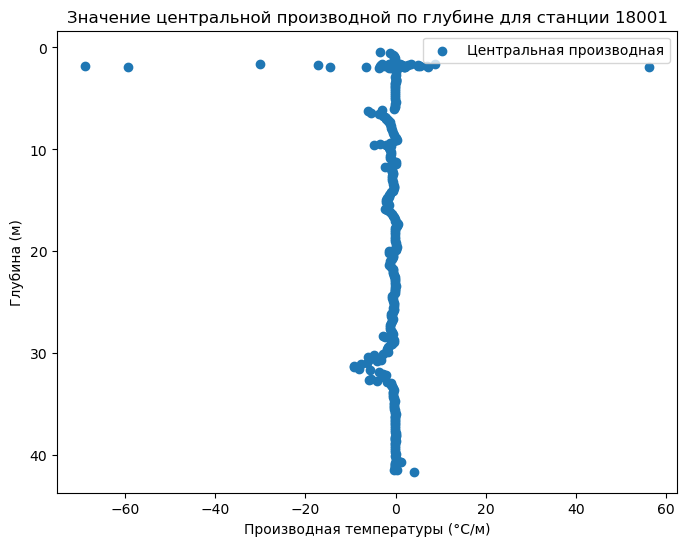

In [6]:
# Преобразуем столбец 'Station' в строки (если он содержит не только строки)
df_results['Station'] = df_results['Station'].astype(str)

# Центральная производная для станции 18001
station = '18001' 
df_station = df_results[df_results['Station'] == station].copy()

if df_station.empty:
    print(f"Данные для станции {station} отсутствуют.")
else:
    print(f"Найдено {len(df_station)} строк для станции {station}")
    
    # Удалим строки с NaN в производных
    df_station_clean = df_station.dropna(subset=['Central_diff'])

    if not df_station_clean.empty:
        plt.figure(figsize=(8, 6))
        plt.scatter(df_station_clean['Central_diff'], df_station_clean['Depth [m]'], label='Центральная производная')
        plt.gca().invert_yaxis() # Чтобы глубина увеличивалась вниз
        plt.xlabel('Производная температуры (°C/м)')
        plt.ylabel('Глубина (м)')
        plt.title(f'Значение центральной производной по глубине для станции {station}')
        plt.legend()
        plt.show()
    else:
        print(f"Нет данных для построения графика по станции {station}.")


In [7]:
# Функция для определения термоклина
def find_thermocline(df, threshold=2):
    # Ищем строки, где производная центральной разности больше порога 
    # (threshold - пороговое значение для изменения производной, при котором мы считаем что начинается термоклин), я выбрала +-2 по графику
    df['Thermocline'] = abs(df['Central_diff']) > threshold
    
    # Находим начало термоклина и его толщину
    if df['Thermocline'].any():
        thermocline_start_depth = df[df['Thermocline']]['Depth [m]'].iloc[0] # Первая точка резкого скачка
        thermocline_end_depth = df[df['Thermocline']]['Depth [m]'].iloc[-1] # Последняя точка
        thermocline_thickness = thermocline_end_depth - thermocline_start_depth
    else:
        thermocline_start_depth = None
        thermocline_thickness = None
    
    return thermocline_start_depth, thermocline_thickness

In [8]:
thermocline_data = []

for station in stations:
    # Выбираем данные для станции
    df_station = df_clean[df_clean['Station'] == station].copy()
    
    # Оставляем только данные для глубин больше 3 метров
    df_station_filtered = df_station[df_station['Depth [m]'] > 3].copy()
    
    if not df_station_filtered.empty:
        # Рассчитываем производные
        df_station_with_diff = calculate_derivatives(df_station_filtered)
        
        # Определяем термоклин
        start_depth, thickness = find_thermocline(df_station_with_diff)

        if start_depth is not None and thickness is not None:
            thermocline_data.append([station, start_depth, thickness])

# Итоговая таблица с результатами
thermocline_df = pd.DataFrame(thermocline_data, columns=['№ Станции', 'Глубина начала', 'Толщина'])
print(thermocline_df)


    № Станции  Глубина начала    Толщина
0       18001        6.119408  35.533656
1       18002        4.499731  38.371391
2       18003        5.425219  32.116778
3       18004        8.653187  28.764910
4       18005       12.118968  46.664019
..        ...             ...        ...
101     18102       18.726612  26.673865
102     18103       19.606076  14.522863
103     18104       18.331502  16.881717
104     18105       25.122431   9.453361
105     18108       16.980305   0.000000

[106 rows x 3 columns]
